# P4 - PART 1 - DATA CLEANING & EDA

In [9]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
# Reading in all data
spray = pd.read_csv('./predict-west-nile-virus/data/spray.csv')
test = pd.read_csv('./predict-west-nile-virus/data/test.csv')
train = pd.read_csv('./predict-west-nile-virus/data/train.csv')
weather = pd.read_csv('./predict-west-nile-virus/data/weather.csv')

## <u>DATA CLEANING & EDA - WEATHER</u>

In [5]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [7]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Station,2944.0,1.500000,0.500085,1.0,1.0,1.5,2.0,2.0
Tmax,2944.0,76.166101,11.461970,41.0,69.0,78.0,85.0,104.0
Tmin,2944.0,57.810462,10.381939,29.0,50.0,59.0,66.0,83.0
DewPoint,2944.0,53.457880,10.675181,22.0,46.0,54.0,62.0,75.0
ResultSpeed,2944.0,6.960666,3.587527,0.1,4.3,6.4,9.2,24.1
ResultDir,2944.0,17.494905,10.063609,1.0,7.0,19.0,25.0,36.0


#### Change to datetime format:

In [8]:
weather['Date'] = pd.to_datetime(weather['Date'])

#### Setting `Date` as index:

In [9]:
weather = weather.set_index('Date')

### Tmax, Tmin, Tavg:
#### Impute for missing `Tavg`:

In [10]:
weather.loc[weather['Tavg'] == 'M', 'Tmax']

Date
2007-05-04     78
2008-07-08     86
2008-10-01     62
2011-07-22    100
2012-08-22     84
2013-05-02     71
2013-09-24     91
2013-09-29     84
2013-10-06     76
2014-05-02     80
2014-08-26     86
Name: Tmax, dtype: int64

In [11]:
Tavg_mean = (
    weather.loc[weather['Tavg'] == 'M']['Tmax'] + 
    weather.loc[weather['Tavg'] == 'M']['Tmin']) /2

In [12]:
weather.loc[weather['Tavg'] == 'M', 'Tavg'] = Tavg_mean

#### Converting `Tavg` to integer

In [13]:
weather['Tavg'] = weather['Tavg'].astype(int)

In [14]:
weather['Depart'].value_counts().head()

M     1472
 2      93
-1      84
-2      80
 5      77
Name: Depart, dtype: int64

In [15]:
weather[weather['Depart'] == 'M'].groupby('Station').count()

,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Station,,,,,,,,,,,,,,,,,,,,
2,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472


1. Station 1 does not contain `Depart` information

### `DewPoint` and `WetBulb`
**Wet bulb** temperature essentially measures how much water vapor the atmosphere can hold at current weather conditions. A lower wet bulb temperature means the air is drier and can hold more water vapor than it can at a higher wet bulb temperature.

**Dew points** indicate the amount moisture in the air. The higher the dew points, the higher the moisture content of the air at a given temperature.

In [16]:
weather[weather['WetBulb'] == 'M']

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2009-06-26,1,86,69,78,7,60,M,0,13,0418,1931,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2013-08-10,1,81,64,73,0,57,M,0,8,0454,1900,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2013-08-11,1,81,60,71,-2,61,M,0,6,0455,1859,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2013-08-12,2,85,69,77,M,63,M,0,12,-,-,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [17]:
weather['WetBulb'].value_counts()

63    135
65    131
59    129
61    123
64    121
62    118
67    117
66    113
60    111
69    107
57    105
70    102
55     99
71     99
68     98
56     95
58     95
52     78
46     72
72     71
53     69
47     61
51     57
73     56
54     56
50     55
45     53
48     51
74     50
49     50
44     45
42     35
43     31
40     31
75     20
41     19
38     17
39     15
36      9
35      8
76      8
77      8
34      5
33      5
37      5
M       4
78      1
32      1
Name: WetBulb, dtype: int64

### `Heat` and `Cool`
Heat and cool are the difference of 65 against the `Tavg` (Unsure why cool measures above 65). We can impute missing values based on `Tavg`.

In [18]:
cool_mask = (weather['Tavg'] > 65) & (weather['Cool'] == 'M')
heat_mask = (weather['Tavg'] < 65) & (weather['Heat'] == 'M')

In [19]:
weather.loc[cool_mask,'Cool'] = weather[cool_mask]['Tavg'] - 65
weather.loc[heat_mask,'Heat'] = 65 - weather[heat_mask]['Tavg']

In [20]:
weather.loc[(weather['Heat'] == 'M'), 'Heat'] = 0
weather.loc[(weather['Cool'] == 'M'), 'Cool'] = 0

In [21]:
weather['Heat'].astype(int)
weather['Cool'].astype(int)

Date
2007-05-01    2
2007-05-01    3
2007-05-02    0
2007-05-02    0
2007-05-03    0
             ..
2014-10-29    0
2014-10-30    0
2014-10-30    0
2014-10-31    0
2014-10-31    0
Name: Cool, Length: 2944, dtype: int64

### `Sunrise` and `Sunset`
We can see from the below that Station 2 is missing Sunrise and Sunset data:

In [22]:
weather[weather['Sunrise'] == '-'].groupby('Station').count()

,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Station,,,,,,,,,,,,,,,,,,,,
2,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472


### `CodeSum`

Consider one-hotting this column? - #L: I think we can nuke this column, since 1609 have "no sign" and are considered moderate?

In [23]:
weather['CodeSum'].isnull().sum()

0

In [24]:
weather['CodeSum'].value_counts()

                         1609
RA                        296
RA BR                     238
BR                        110
TSRA RA BR                 92
BR HZ                      81
RA DZ BR                   65
TSRA RA                    43
HZ                         39
RA BR HZ                   38
TSRA                       34
RA DZ                      22
TSRA BR                    21
TS TSRA RA BR              19
RA HZ                      16
TS RA                      13
TSRA RA BR HZ              12
TS TSRA BR                 10
DZ BR                      10
TS                         10
DZ BR HZ                    9
TS RA BR                    8
TSRA BR HZ                  8
DZ                          8
TS TSRA                     7
TS TSRA BR HZ               7
RA DZ BR HZ                 7
TS TSRA RA                  7
TS BR                       4
TSRA HZ                     4
TSRA RA BR VCTS             4
RA SN                       4
FG+ BR                      4
TSRA RA DZ

### `Depth` and `Water1`

In [25]:
weather['Depth'].value_counts()

0    1472
M    1472
Name: Depth, dtype: int64

In [26]:
weather['Water1'].value_counts()

M    2944
Name: Water1, dtype: int64

In [27]:
weather['SnowFall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64

#### Dropping depth & water1 columns since data not indicative:

In [28]:
weather = weather.drop(columns=['Depth', 'Water1'])

### `PrecipTotal`

In [29]:
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
0.04      36
0.05      32
0.12      28
0.08      28
0.06      27
0.07      23
0.09      21
0.16      21
0.14      20
0.11      20
0.17      17
0.28      15
0.19      14
0.18      14
0.13      14
0.15      13
0.20      13
0.23      11
0.26      11
0.25      11
0.24      10
0.10      10
0.31       9
0.21       9
0.40       9
0.43       9
0.39       9
0.29       9
0.34       8
0.32       8
0.22       8
0.37       7
0.30       7
0.41       7
0.50       7
0.59       7
0.48       7
0.33       7
0.45       7
0.65       6
0.80       6
0.27       6
0.84       6
0.63       6
0.36       5
0.44       5
0.92       5
0.54       5
0.93       5
0.68       5
0.85       5
0.52       4
0.55       4
0.89       4
1.23       4
0.75       4
0.97       4
0.51       4
0.70       4
0.66       4
0.72       4
0.58       4
0.64       4
0.87       3
0.82       3
1.03       3
0.47       3
1.31       3
1.05       3
1.01       3
0.60       3
0.71       3

In [30]:
weather[weather['PrecipTotal']=='M']

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,
2007-06-28,2,73,61,67,M,56,61,0,2,-,-,,M,M,29.43,30.07,12.2,2,13.3
2007-06-29,2,71,56,64,M,56,60,1,0,-,-,,M,M,29.47,30.11,7.4,2,8.2


### `StnPressure` & `SeaLevel`
Imputing missing `StnPressure` & `SeaLevel` values:

In [31]:
weather[weather['StnPressure'] == 'M']
weather[weather['SeaLevel'] == 'M']

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,
2007-06-13,2,86,68,77,M,53,62,0,12,-,-,,M,0.00,M,M,7.0,5,M
2009-06-18,1,80,61,71,1,63,67,0,6,0416,1929,RA BR,0.0,0.12,29.08,M,6.7,16,7.9
2009-09-07,1,77,59,68,1,59,62,0,3,0523,1817,BR,0.0,0.00,29.39,M,5.8,3,4.0
2011-09-08,1,75,57,66,0,53,59,0,1,0524,1815,RA,0.0,T,29.34,M,13.0,2,13.4
2011-09-14,2,60,48,54,M,45,51,11,0,-,-,RA BR HZ FU,M,T,29.47,M,6.0,32,M
2011-09-20,1,74,49,62,0,54,58,3,0,0537,1753,MIFG BCFG BR,0.0,0.00,29.26,M,7.3,18,7.3
2012-08-22,2,84,72,78,M,51,61,0,13,-,-,,M,0.00,29.39,M,4.7,19,M
2012-09-03,1,88,71,80,12,70,73,0,15,0519,1824,BR,0.0,0.00,29.17,M,4.6,6,4.4
2014-07-23,2,76,64,70,M,56,61,0,5,-,-,,M,0.00,29.47,M,16.4,2,16.7


In [32]:
weather.loc[weather['StnPressure'] == 'M', 'StnPressure'] = \
weather.loc[weather['StnPressure'] != 'M', 'StnPressure'].astype(float).mean()

weather.loc[weather['SeaLevel'] == 'M', 'SeaLevel'] = \
weather.loc[weather['SeaLevel'] != 'M', 'SeaLevel'].astype(float).mean()

In [33]:
print("final shape: ", weather.shape)

final shape:  (2944, 19)


In [34]:
## Export cleaned weather data to csv:
weather.to_csv('./predict-west-nile-virus/data/weather_cleaned.csv')

## <u>DATA CLEANING & EDA - SPRAY</u>

In [35]:
spray.head(2)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [36]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [37]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

# <u>EDA</u>

In [38]:
weather.shape

(2944, 19)

<AxesSubplot:>

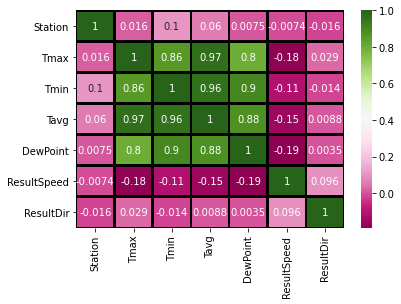

In [39]:
sns.heatmap(weather.corr(), annot = True, fmt='.2g', cmap = 'PiYG', linewidths=1.5,
           linecolor='black')

For SPRAY data:

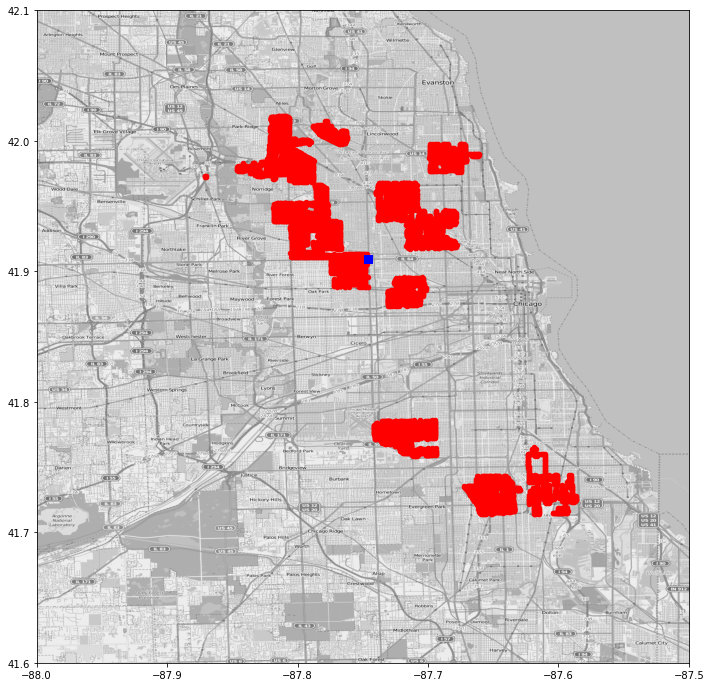

In [40]:
origin = [41.6, -88.0] 
upperRight = [42.1, -87.5]

mapdata = np.loadtxt("./predict-west-nile-virus/others/mapdata_copyright_openstreetmap_contributors.txt")

numPoints = 50
long_nooutlier = spray[spray['Longitude'] > -88]
lats = long_nooutlier['Latitude']
longs = long_nooutlier['Longitude']

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

plt.figure(figsize=(12,12))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs, y=lats, c='r', s=20)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s');

In [41]:
# some matplotlib params to make the defaults a bit more readable
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [42]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [43]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [109]:
for col in train:
    print(f'{col} column count of unique values: {len(train[col].unique())}')

Date column count of unique values: 95
Address column count of unique values: 138
Species column count of unique values: 7
Block column count of unique values: 64
Street column count of unique values: 128
Trap column count of unique values: 136
AddressNumberAndStreet column count of unique values: 138
Latitude column count of unique values: 138
Longitude column count of unique values: 138
AddressAccuracy column count of unique values: 4
NumMosquitos column count of unique values: 50
WnvPresent column count of unique values: 2


In [110]:
# checking for null values
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [113]:
from datetime import datetime
train['datetime format'] = [pd.to_datetime(date) for date in train['Date']]

In [38]:
train.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

Spikes are all mid year:

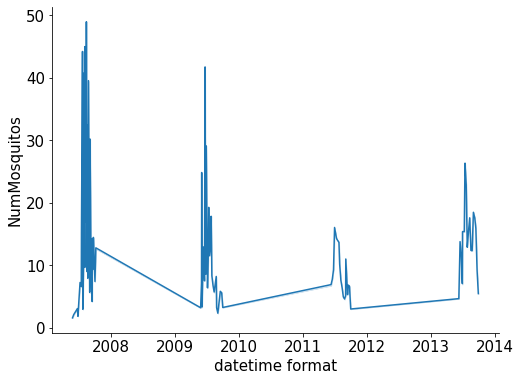

In [114]:
sns.lineplot(x = "datetime format", y = "NumMosquitos", data = train, ci=False);
# noticed that the spikes are because the 

## TRAIN DATA

In [4]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [8]:
#checking dtypes - we need to change date to the correct format
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [14]:
train['Date'] = pd.to_datetime(train['Date'], format= '%Y-%m-%d')

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Block,10506.0,35.687797,24.339468,10.000000,12.000000,33.000000,52.000000,98.000000
Latitude,10506.0,41.841139,0.112742,41.644612,41.732984,41.846283,41.954690,42.017430
Longitude,10506.0,-87.699908,0.096514,-87.930995,-87.760070,-87.694991,-87.627796,-87.531635
AddressAccuracy,10506.0,7.819532,1.452921,3.000000,8.000000,8.000000,9.000000,9.000000
NumMosquitos,10506.0,12.853512,16.133816,1.000000,2.000000,5.000000,17.000000,50.000000
WnvPresent,10506.0,0.052446,0.222936,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
for col in train:
    print(f'{col} column count of unique values: {len(train[col].unique())}')

Date column count of unique values: 95
Address column count of unique values: 138
Species column count of unique values: 7
Block column count of unique values: 64
Street column count of unique values: 128
Trap column count of unique values: 136
AddressNumberAndStreet column count of unique values: 138
Latitude column count of unique values: 138
Longitude column count of unique values: 138
AddressAccuracy column count of unique values: 4
NumMosquitos column count of unique values: 50
WnvPresent column count of unique values: 2


Text(0.5, 1.0, 'Presence of WNV by Date')

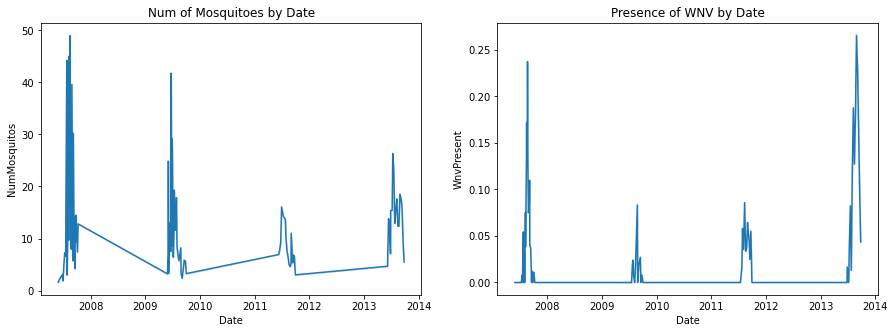

In [37]:
#lineplot based on dates
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(ax=axes[0], x = 'Date', y= 'NumMosquitos', data=train, ci=False);
axes[0].set_title("Num of Mosquitoes by Date")


sns.lineplot(ax=axes[1], x = 'Date', y= 'WnvPresent', data=train, ci=False);
axes[1].set_title("Presence of WNV by Date")



In [ ]:
#label encode mosquito breed
#corrs plot WNV bs mosquito breed?

<ipython-input-29-7a91c0ec624c>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train.Date.dt.week.hist();


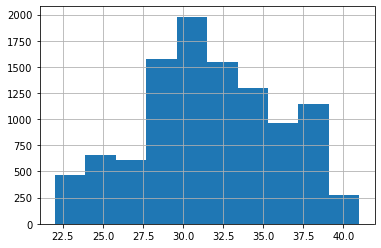

In [29]:
#lineplot based on week of year
#this is the no of datapoints per week of year
train.Date.dt.week.hist();

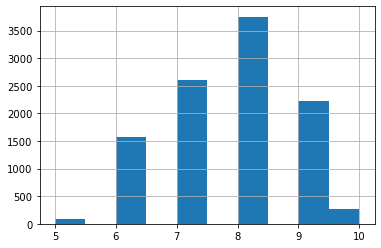

In [59]:
train.Date.dt.month.hist();

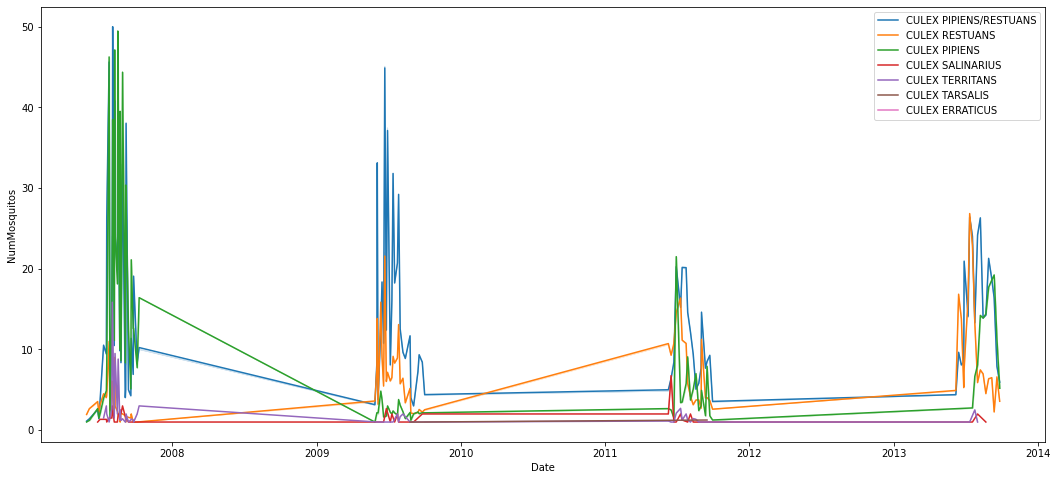

In [45]:
# lineplot by 'Species'
plt.figure(figsize=(18,8))
sns.lineplot(x = "Date", y = "NumMosquitos", data = train, ci=False, hue='Species')
plt.legend()

In [41]:
# try extracting the month-year format from datetime columns
train['mth-year']= train['Date'].dt.strftime('%m-%Y')

In [42]:
train['mth-year'].unique()

array(['05-2007', '06-2007', '07-2007', '08-2007', '09-2007', '10-2007',
       '05-2009', '06-2009', '07-2009', '08-2009', '09-2009', '10-2009',
       '06-2011', '07-2011', '08-2011', '09-2011', '06-2013', '07-2013',
       '08-2013', '09-2013'], dtype=object)

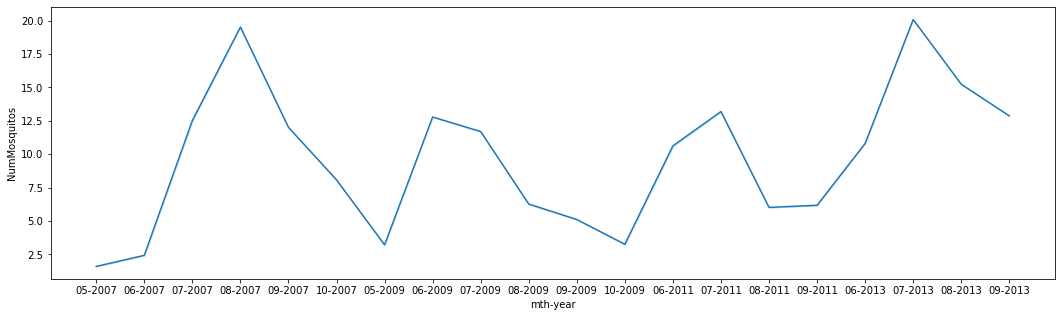

In [43]:
plt.figure(figsize=(18,5))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = train, ci=False)
plt.xticks(fontsize=10);
#need to reduce the tick size... no space lol

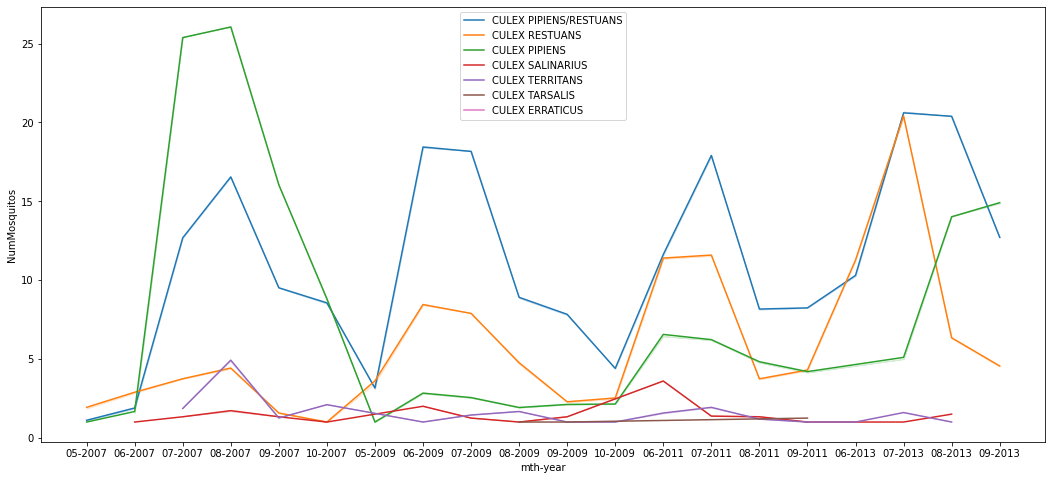

In [44]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = train, ci=False, hue='Species')
plt.legend()
plt.xticks(fontsize=10);
# can start to observe that the number of mosquitoes are different for different location

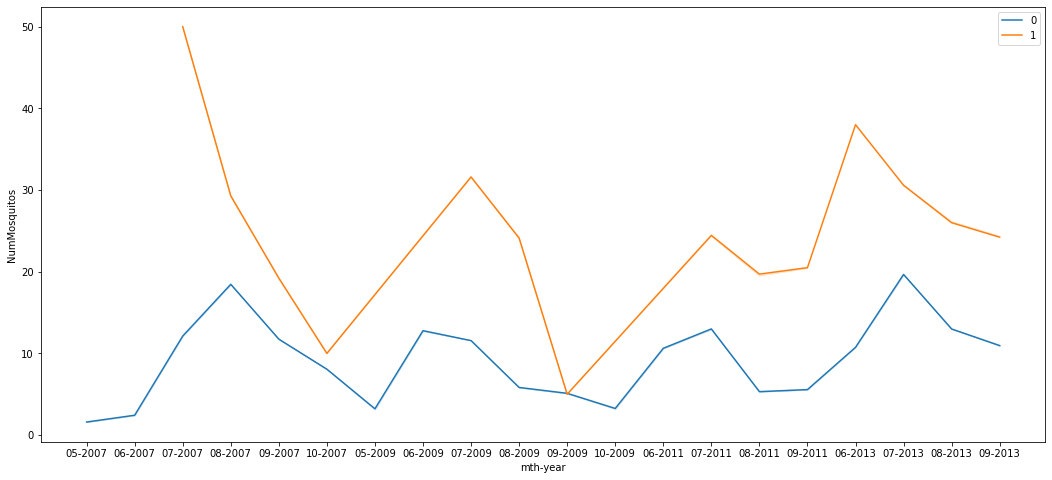

In [46]:
# hue = 'WnvPresent'

plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = train, ci=False, hue='WnvPresent')
plt.legend()
plt.xticks(fontsize=10);
# can start to observe that the number of mosquitoes are different for different location

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

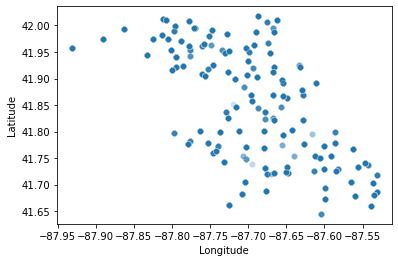

In [48]:
# decided to plot the scatter plot latitude, y=longitude

sns.scatterplot(data=train, x="Longitude", y="Latitude", alpha=0.1, )

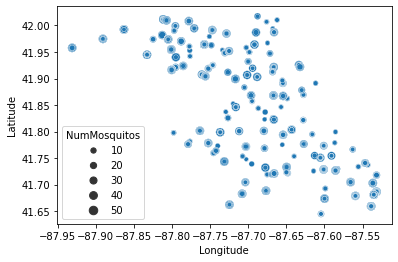

In [54]:
# exploring the size keyword, bigger size means more mosquitoes at the Latitude,Longitude
sns.scatterplot(data=train, x="Longitude", y="Latitude", size='NumMosquitos');

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

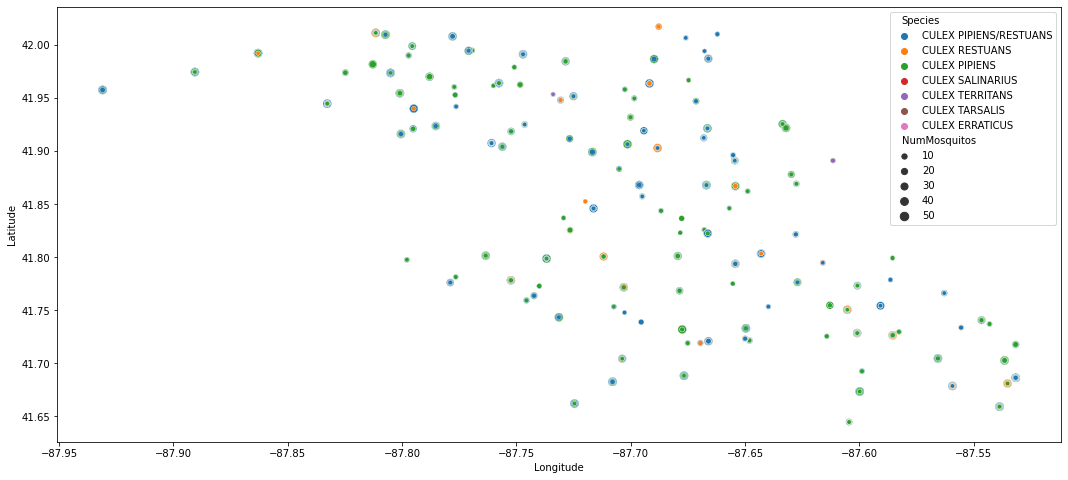

In [58]:
# this plot rather confusing and hard to intepret as different species can be in the same latitude/longitude
plt.figure(figsize=(18,8))
sns.scatterplot(data=train, x="Longitude", y="Latitude", size='NumMosquitos', hue='Species')

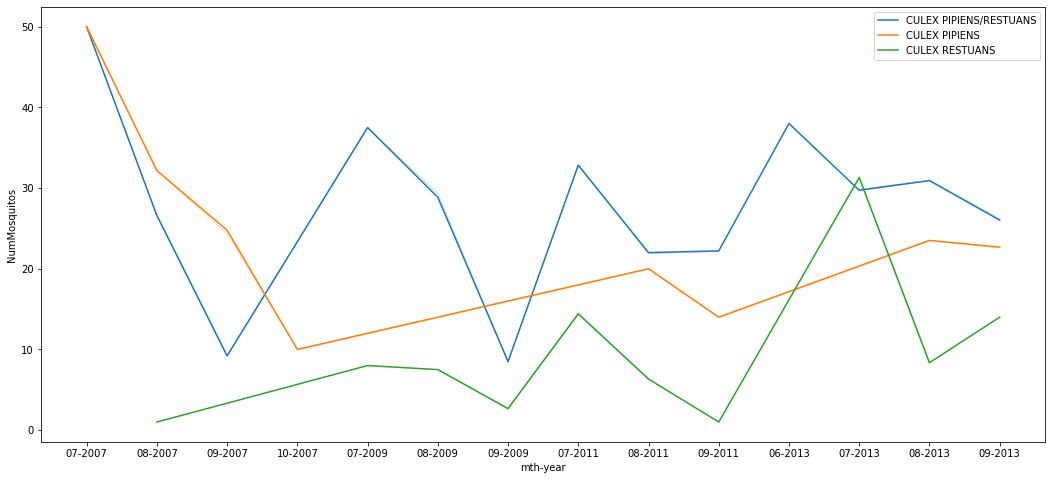

In [65]:
wnv_present = train[train['WnvPresent']==1]

plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = wnv_present, ci=False, hue='Species')
plt.legend()
plt.xticks(fontsize=10);
##Q:
#can we drop those 0 values and label encode??

No handles with labels found to put in legend.


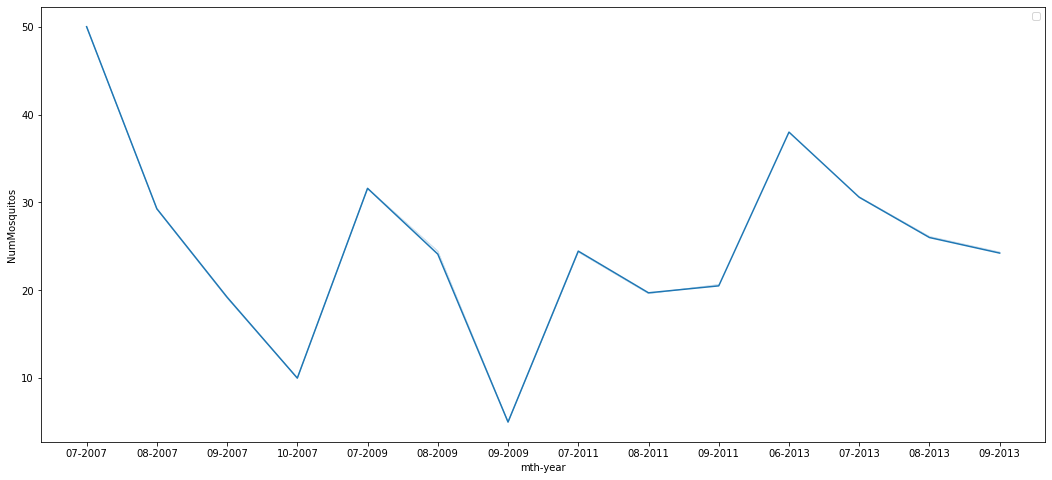

In [67]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = wnv_present, ci=False)
plt.legend()
plt.xticks(fontsize=10);

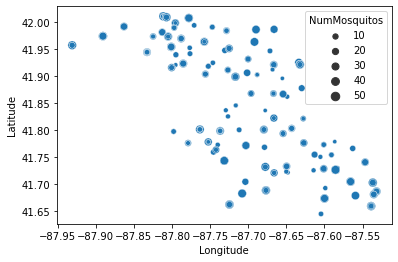

In [66]:
sns.scatterplot(data=wnv_present, x="Longitude", y="Latitude", size='NumMosquitos');